In [20]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score




In [21]:
url = "https://drive.google.com/file/d/14nr7lkB1_fF61Mba9mNgTnCeFlxBATnt/view?usp=sharing" # spotify list
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
'''
songs_original_df = pd.read_csv(path, 
                               sep=None, 
                               engine='python', 
                               quoting=3,
                               quotechar='"',
                      
                               on_bad_lines='skip', 
                     
                               skipinitialspace=bool)
'''
songs_original_df = pd.read_csv(path)


songs_original_df.columns = songs_original_df.columns.str.replace(' ', '')


to_drop=['Unnamed:0']


songs_original_df = songs_original_df.drop(columns=to_drop)  
songs_original_df = songs_original_df.drop_duplicates()


to_drop=[ 'key',
          'mode',
          'type',
          'duration_ms',
          'time_signature',
          'id',
          #'html',
          'artist',
          'liveness',
          'speechiness',
          'loudness',
          'energy',
         # 'acousticness',
          #'instrumentalness',
          'valence',
          'tempo',
          'danceability'
    
         ]
        
songs_original_df = songs_original_df.drop(columns=to_drop)  
songs_original_df= songs_original_df.set_index(['name', 'html'])

songs_original_df = songs_original_df.drop_duplicates()


songs_original_df #= songs_orignal_df.head(50)

,,acousticness,instrumentalness
name,html,,
Se Eu Quiser Falar Com Deus,https://open.spotify.com/track/1n7JnwviZ7zf0LR1tcGFq7,0.694,0.000059
Saudade De Bahia,https://open.spotify.com/track/5QGM1U0eCYrQuwSJwTm5Zq,0.217,0.000002
"Canta Canta, Minha Gente",https://open.spotify.com/track/0NLIFSZxPzQhCwnkn5PJYs,0.453,0.000063
Mulher Eu Sei,https://open.spotify.com/track/3mXqOdlLE1k67WsAxryPFs,0.879,0.000041
Rosa Morena,https://open.spotify.com/track/7bSzjzjTkWT2CkIPPdp0eA,0.916,0.000343
...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",https://open.spotify.com/track/1aEhYlZtypmipA06SDJ4U3,0.917,0.715000
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",https://open.spotify.com/track/1Gfqe7TAKklmuZf6hxsH6h,0.855,0.426000
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",https://open.spotify.com/track/2XNwnFrdMDpismp0VUZ7cU,0.951,0.969000


In [22]:
songs_original_df.duplicated().sum()

0

In [23]:
songs_original_df = songs_original_df.drop_duplicates()

Min_Max_Scaler

In [24]:
songs = songs_original_df.copy()
# Initialise the transformer (optionally, set parameters)
my_min_max = MinMaxScaler().set_output(transform="pandas")

# Use the transformer to transform the data
min_max_df = my_min_max.fit_transform(songs)
min_max_scaled_df = min_max_df.copy()
# [['danceability','energy','loudness','acousticness','instrumentalness']]

Distance DF plot

In [25]:
'''
min_max_songs_distance = pd.DataFrame(pairwise_distances(min_max_df),
                                   index=songs_orignal_df.index,
                                   columns=songs_orignal_df.index)

# Create a figure with a size of 12 inches by 8 inches
plt.subplots(figsize=(12, 8))

# Generate a heatmap of the Euclidean distances DataFrame
sns.heatmap(min_max_songs_distance);
'''

'\nmin_max_songs_distance = pd.DataFrame(pairwise_distances(min_max_df),\n                                   index=songs_orignal_df.index,\n                                   columns=songs_orignal_df.index)\n\n# Create a figure with a size of 12 inches by 8 inches\nplt.subplots(figsize=(12, 8))\n\n# Generate a heatmap of the Euclidean distances DataFrame\nsns.heatmap(min_max_songs_distance);\n'

KMEANS

In [26]:
my_kmeans = KMeans(n_clusters= 38, # you always choose the number of k here
                   n_init = "auto",
                   random_state = 123)

# Fit the model to the data
my_kmeans.fit(min_max_df)

# Obtain the cluster output
clusters = my_kmeans.labels_

# Attach the cluster output to our original DataFrame
min_max_df["playlist"] = clusters

#min_max_df.loc[min_max_df['playlist']==7,:]
min_max_df

,,acousticness,instrumentalness,playlist
name,html,,,
Se Eu Quiser Falar Com Deus,https://open.spotify.com/track/1n7JnwviZ7zf0LR1tcGFq7,0.696787,0.000060,15
Saudade De Bahia,https://open.spotify.com/track/5QGM1U0eCYrQuwSJwTm5Zq,0.217871,0.000002,18
"Canta Canta, Minha Gente",https://open.spotify.com/track/0NLIFSZxPzQhCwnkn5PJYs,0.454819,0.000064,22
Mulher Eu Sei,https://open.spotify.com/track/3mXqOdlLE1k67WsAxryPFs,0.882530,0.000041,31
Rosa Morena,https://open.spotify.com/track/7bSzjzjTkWT2CkIPPdp0eA,0.919679,0.000348,4
...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",https://open.spotify.com/track/1aEhYlZtypmipA06SDJ4U3,0.920683,0.725888,23
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",https://open.spotify.com/track/1Gfqe7TAKklmuZf6hxsH6h,0.858434,0.432487,11
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",https://open.spotify.com/track/2XNwnFrdMDpismp0VUZ7cU,0.954819,0.983756,19


In [27]:
#min_max_df.groupby(by="playlist").mean()

In [28]:
centroids = my_kmeans.cluster_centers_
centroids_df=pd.DataFrame(centroids)
centroids_df

,0,1
0,0.003990,0.807976
1,0.377907,0.003226
2,0.920621,0.933622
3,0.010422,0.004234
4,0.953289,0.008535
5,0.006804,0.444428
6,0.646289,0.006181
7,0.133132,0.004709
8,0.935859,0.564662
9,0.010214,0.181743


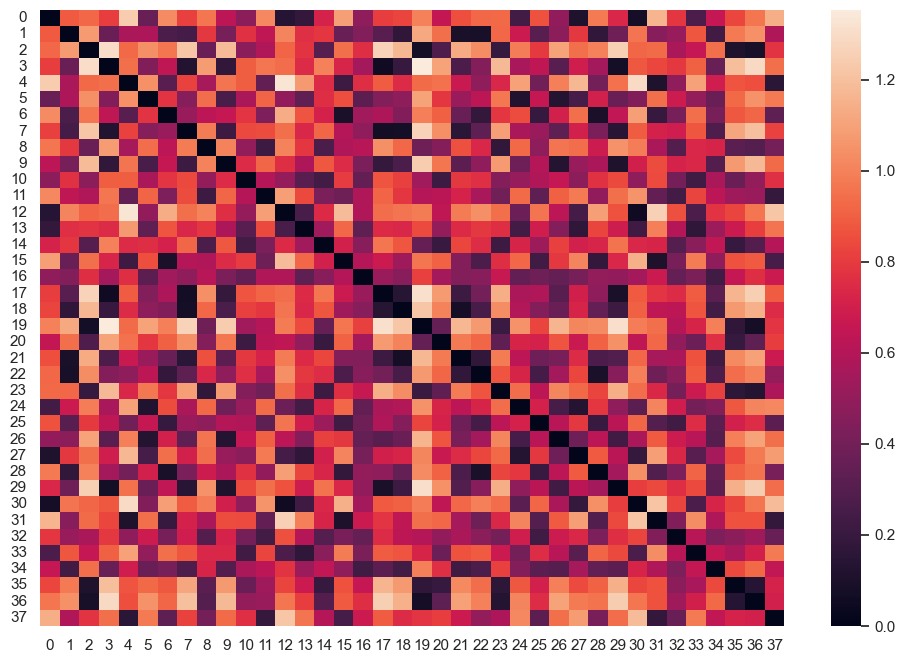

In [29]:

centroids_df_dist = pd.DataFrame(pairwise_distances(centroids_df))

# Create a figure with a size of 12 inches by 8 inches
plt.subplots(figsize=(12, 8))

# Generate a heatmap of the Euclidean distances DataFrame
sns.heatmap(centroids_df_dist);

In [30]:
#min_max_df.groupby('playlist')['danceability'].count()

In [31]:
#min_max_df.loc[min_max_df['playlist']==5,:]

In [32]:
min_max_scaled_df

,,acousticness,instrumentalness
name,html,,
Se Eu Quiser Falar Com Deus,https://open.spotify.com/track/1n7JnwviZ7zf0LR1tcGFq7,0.696787,0.000060
Saudade De Bahia,https://open.spotify.com/track/5QGM1U0eCYrQuwSJwTm5Zq,0.217871,0.000002
"Canta Canta, Minha Gente",https://open.spotify.com/track/0NLIFSZxPzQhCwnkn5PJYs,0.454819,0.000064
Mulher Eu Sei,https://open.spotify.com/track/3mXqOdlLE1k67WsAxryPFs,0.882530,0.000041
Rosa Morena,https://open.spotify.com/track/7bSzjzjTkWT2CkIPPdp0eA,0.919679,0.000348
...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",https://open.spotify.com/track/1aEhYlZtypmipA06SDJ4U3,0.920683,0.725888
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",https://open.spotify.com/track/1Gfqe7TAKklmuZf6hxsH6h,0.858434,0.432487
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",https://open.spotify.com/track/2XNwnFrdMDpismp0VUZ7cU,0.954819,0.983756


In [33]:
min_max_df

,,acousticness,instrumentalness,playlist
name,html,,,
Se Eu Quiser Falar Com Deus,https://open.spotify.com/track/1n7JnwviZ7zf0LR1tcGFq7,0.696787,0.000060,15
Saudade De Bahia,https://open.spotify.com/track/5QGM1U0eCYrQuwSJwTm5Zq,0.217871,0.000002,18
"Canta Canta, Minha Gente",https://open.spotify.com/track/0NLIFSZxPzQhCwnkn5PJYs,0.454819,0.000064,22
Mulher Eu Sei,https://open.spotify.com/track/3mXqOdlLE1k67WsAxryPFs,0.882530,0.000041,31
Rosa Morena,https://open.spotify.com/track/7bSzjzjTkWT2CkIPPdp0eA,0.919679,0.000348,4
...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",https://open.spotify.com/track/1aEhYlZtypmipA06SDJ4U3,0.920683,0.725888,23
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",https://open.spotify.com/track/1Gfqe7TAKklmuZf6hxsH6h,0.858434,0.432487,11
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",https://open.spotify.com/track/2XNwnFrdMDpismp0VUZ7cU,0.954819,0.983756,19


In [34]:
dict2 = []
k_min =20
k_max = 60
seed= 234
for k in range(k_min,k_max):
    my_kmeans2 = KMeans(n_clusters= k, # you always choose the number of k here
                    n_init = "auto",
                    random_state = seed)
    
    # Fit the model to the data
    my_kmeans2.fit(min_max_scaled_df)
    labels = my_kmeans2.labels_

    score = silhouette_score(min_max_scaled_df, labels)
    dict2.append(score)


/Applications/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


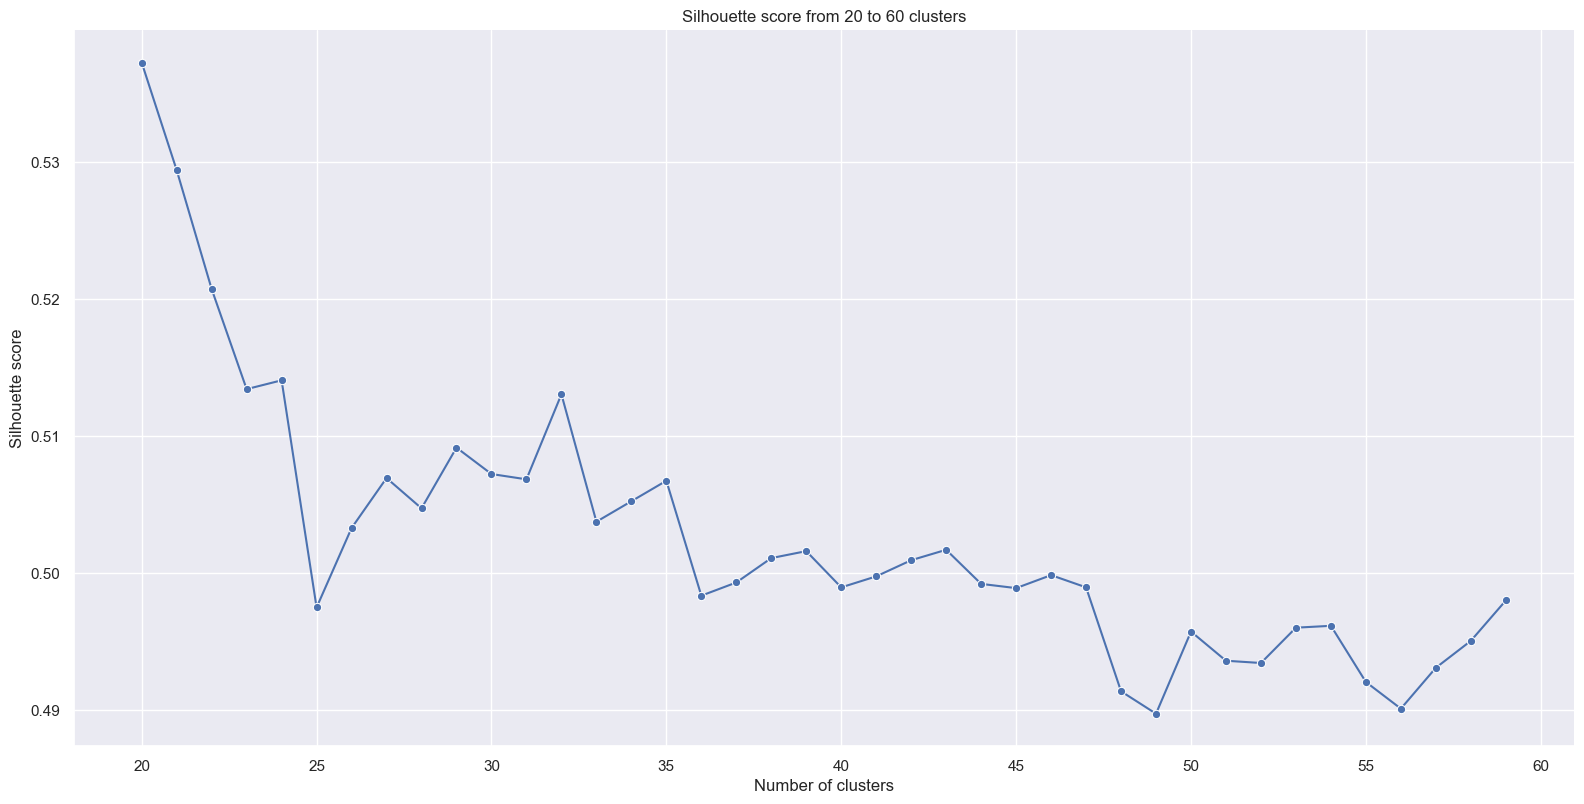

In [35]:
sns.set_theme(style='darkgrid')
(
sns.relplot(y=dict2,
            x=range(k_min,k_max),
            kind='line',
            marker='o',
            height = 8,
            aspect=2)
.set(title=f"Silhouette score from {k_min} to {k_max} clusters")
.set_axis_labels("Number of clusters", "Silhouette score")
)

Inertia and elbow method

In [36]:
min_max_scaled_df

,,acousticness,instrumentalness
name,html,,
Se Eu Quiser Falar Com Deus,https://open.spotify.com/track/1n7JnwviZ7zf0LR1tcGFq7,0.696787,0.000060
Saudade De Bahia,https://open.spotify.com/track/5QGM1U0eCYrQuwSJwTm5Zq,0.217871,0.000002
"Canta Canta, Minha Gente",https://open.spotify.com/track/0NLIFSZxPzQhCwnkn5PJYs,0.454819,0.000064
Mulher Eu Sei,https://open.spotify.com/track/3mXqOdlLE1k67WsAxryPFs,0.882530,0.000041
Rosa Morena,https://open.spotify.com/track/7bSzjzjTkWT2CkIPPdp0eA,0.919679,0.000348
...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",https://open.spotify.com/track/1aEhYlZtypmipA06SDJ4U3,0.920683,0.725888
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",https://open.spotify.com/track/1Gfqe7TAKklmuZf6hxsH6h,0.858434,0.432487
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",https://open.spotify.com/track/2XNwnFrdMDpismp0VUZ7cU,0.954819,0.983756


In [37]:

inertia_list = [] # empty list to append via loop

for i in range(2, k_max):
    myKMeans_inertia = KMeans(n_clusters = i,
                      n_init='auto',
                      random_state=seed)
    myKMeans_inertia.fit(min_max_scaled_df)
    inertia_list.append(myKMeans_inertia.inertia_)

inertia_list

[661.8130550910448,
 361.0429883974018,
 114.12539585658459,
 82.1269909274244,
 59.72489742144859,
 49.41486273816098,
 46.03424699588759,
 36.02769381109933,
 32.9035479095704,
 28.395068814586878,
 23.90558180164431,
 21.893103090927852,
 19.89300470896653,
 18.780986519248593,
 17.133114549211314,
 16.2721642145469,
 14.76087306087528,
 14.157147248486991,
 13.062789832378435,
 12.39973182609844,
 11.765766784515382,
 10.645961498238842,
 9.78527185178573,
 9.386802942080408,
 8.931613654707387,
 8.575267178144482,
 8.222643875917313,
 7.557728088010607,
 7.319469190631429,
 7.052577399669891,
 6.721583885590571,
 6.565952396774117,
 6.527290470676089,
 6.14526915142827,
 5.931357097743305,
 5.7834654949032975,
 5.570157773788053,
 5.3077839494322205,
 5.181858927189335,
 4.983344462137791,
 4.833173011645102,
 4.655720850310791,
 4.465656860098384,
 4.385430962985971,
 4.282891206328378,
 4.188730347318725,
 4.0783851108230795,
 3.9048553921411524,
 3.8294867124637624,
 3.72402982

plot it

In [38]:
min_max_scaled_df

,,acousticness,instrumentalness
name,html,,
Se Eu Quiser Falar Com Deus,https://open.spotify.com/track/1n7JnwviZ7zf0LR1tcGFq7,0.696787,0.000060
Saudade De Bahia,https://open.spotify.com/track/5QGM1U0eCYrQuwSJwTm5Zq,0.217871,0.000002
"Canta Canta, Minha Gente",https://open.spotify.com/track/0NLIFSZxPzQhCwnkn5PJYs,0.454819,0.000064
Mulher Eu Sei,https://open.spotify.com/track/3mXqOdlLE1k67WsAxryPFs,0.882530,0.000041
Rosa Morena,https://open.spotify.com/track/7bSzjzjTkWT2CkIPPdp0eA,0.919679,0.000348
...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",https://open.spotify.com/track/1aEhYlZtypmipA06SDJ4U3,0.920683,0.725888
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",https://open.spotify.com/track/1Gfqe7TAKklmuZf6hxsH6h,0.858434,0.432487
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",https://open.spotify.com/track/2XNwnFrdMDpismp0VUZ7cU,0.954819,0.983756


/Applications/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


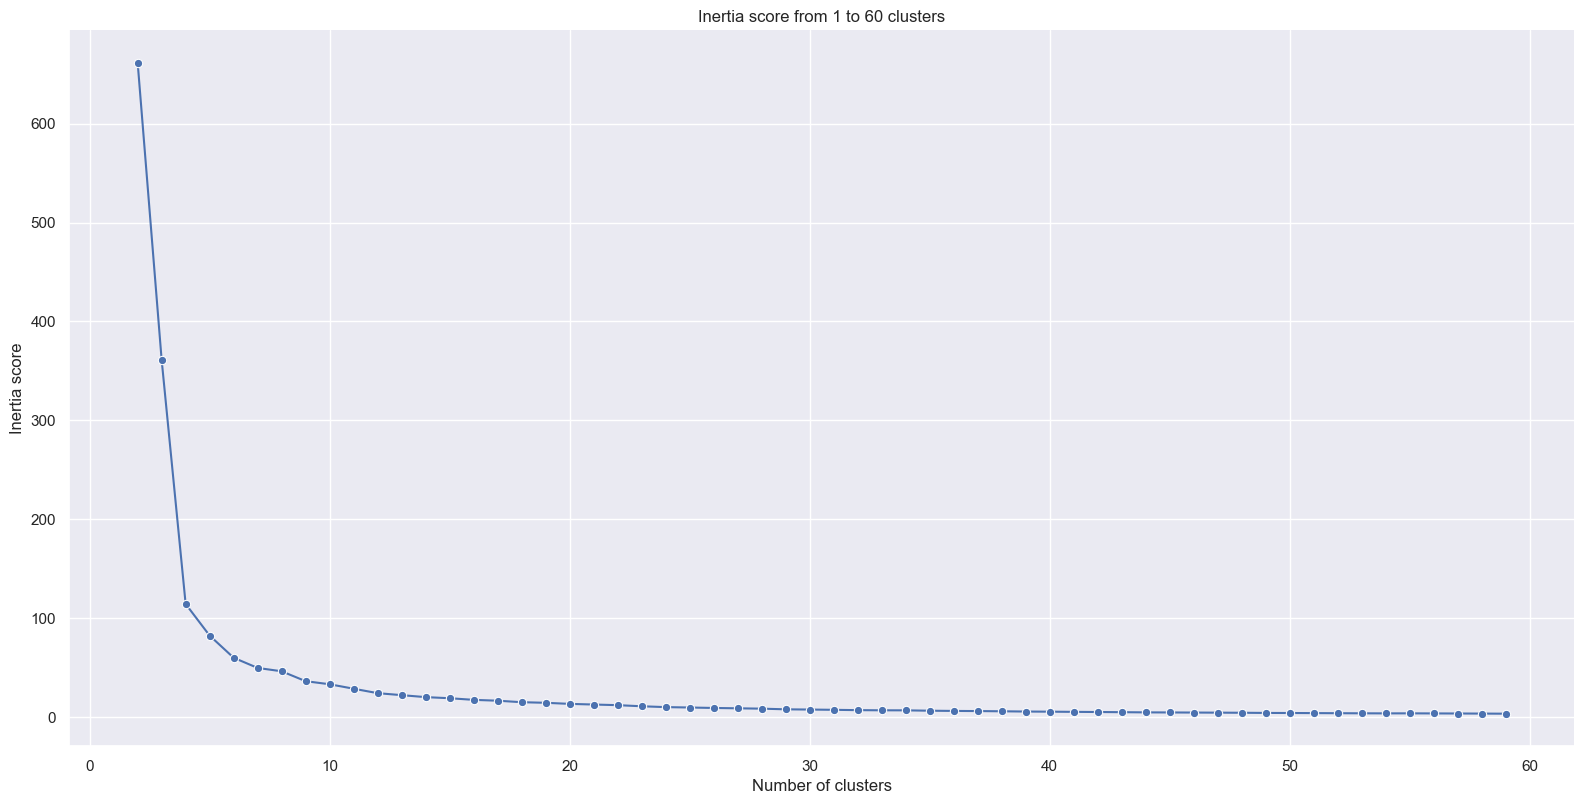

In [39]:
# Set the Seaborn theme to darkgrid
sns.set_theme(style='darkgrid')

(
# Create a line plot of the inertia scores
sns.relplot(y = inertia_list,
            x = range(2,k_max),
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 2)
# Set the title of the plot
.set(title=f"Inertia score from 1 to {k_max} clusters")
# Set the axis labels
.set_axis_labels("Number of clusters", "Inertia score")
)

In [40]:
min_max_df.groupby('playlist').count()

,acousticness,instrumentalness
playlist,,
0,146,146
1,139,139
2,79,79
3,909,909
4,145,145
5,88,88
6,108,108
7,223,223
8,26,26


In [48]:
min_max_df.loc[min_max_df['playlist']==12
               ].sample(20)

,,acousticness,instrumentalness,playlist
name,html,,,
Carnivoracity,https://open.spotify.com/track/1kFCbKE8wMjF8GtNQVbxjS,0.005633,0.941117,12
Ruins,https://open.spotify.com/track/71Sci3JYEx03GiaCtR7m09,0.008454,0.922843,12
A Suburb to Hell - 1989 EP Version,https://open.spotify.com/track/3EFdhWZjEcILUu5bJxVeCa,0.000000,0.914721,12
Dark Recollections,https://open.spotify.com/track/72klAZkuIGe7tdKBNx5mvv,0.000025,0.964467,12
Redeemed from Time,https://open.spotify.com/track/66ECk8gldLh0Kph6Zc4LKZ,0.000027,0.943147,12
Latitudinarian,https://open.spotify.com/track/0yWyUsXPgZFq6Do5hWJ4Wz,0.000172,0.926904,12
The One Made Of Dreams,https://open.spotify.com/track/3EEoA39TD0Ylye3epDarkA,0.000002,0.919797,12
Wartorn,https://open.spotify.com/track/34m3sUqZ3aP4eQ2ermVQ2s,0.000006,0.915736,12
"No Guts, No Glory",https://open.spotify.com/track/5tUxhJPbbOB4vEwm7ax1m2,0.000001,0.948223,12


In [42]:
new_df  = min_max_df.groupby('playlist').mean().sort_values(by='acousticness', ascending=False)

In [43]:
new_df['sum'] = new_df['acousticness']+ new_df['instrumentalness']
new_df.sort_values(by='sum', ascending=False).head(2)

,acousticness,instrumentalness,sum
playlist,,,
19,0.989483,0.938921,1.928404
2,0.920365,0.934306,1.854671


In [44]:
new_df['acc'] = new_df['acousticness'] - new_df['instrumentalness']
new_df.sort_values(by='acc', ascending=False).head(2)

,acousticness,instrumentalness,sum,acc
playlist,,,,
4,0.953289,0.008535,0.961824,0.944754
31,0.843277,0.005424,0.848701,0.837854


In [45]:
new_df['instr'] =  new_df['instrumentalness']-new_df['acousticness'] 
new_df.sort_values(by='instr', ascending=False).head(2)

,acousticness,instrumentalness,sum,acc,instr
playlist,,,,,
12,0.006286,0.941158,0.947444,-0.934872,0.934872
30,0.002921,0.883849,0.886770,-0.880928,0.880928
